# Tugas 12 

## Nama: Audy Putri Lestari - Studi Independen CAKAP

## Telecom Customer Churn

Telecom Customer churn merupakan kumpulan data dari perusahaan Telekomunikasi fiktif yang menyediakan layanan telepon dan internet kepada 7.043 pelanggan di California, data ini mencakup detail tentang demografi pelanggan, lokasi, layanan, dan status saat ini.

Analisis yang Direkomendasikan:
1. Berapa banyak pelanggan yang bergabung dengan perusahaan selama kuartal terakhir? Berapa banyak pelanggan yang bergabung?
2. Apa profil pelanggan untuk pelanggan yang churn, join, dan stay? Apakah mereka berbeda?
3. Apa yang tampaknya menjadi pendorong utama churn pelanggan?
4. Apakah perusahaan kehilangan pelanggan bernilai tinggi? Jika demikian, bagaimana mereka dapat mempertahankannya?

Analisis tambahan yang dilakukan antara lain:
- Melihat apakah pelanggan yang sudah married mempengaruhi lama tenure pelanggan?
- Melihat manakah features yang berdampak pada customer churn dan tenure_in_months

Link dataset: https://app.mavenanalytics.io/datasets?search=telecom+customer+churn

## Load Data

Pertama akan dilakukan import library yang akan digunakan pada proses analisis data. Library yang digunakan antara lain:
- import psycopg2 --> digunakan untuk menghubungkan interaksi antar python dengan PostgreSQL
- import pandas as pd --> Library pandas digunakan untuk melakukan pembersihan data, transformasi, dan alat untuk menganalisis data.
- import seaborn as sns --> seaborn adalah library berbasis matplotlib yang digunakan untuk visualisasi data statistik.
- import numpy as np --> mengoperasikan berbagai fungsi matematika
- import matplotlib.pyplot as plt --> digunakan untuk membuat plot
- %matplotlib inline --> memastikan plot ditampilkan langsung dalam Jupyter Notebook
- import warnings --> mengontrol tampilan warning
- warnings.filterwarnings('ignore') --> menekan peringatan selama eksekusi kode.

In [79]:
import psycopg2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Menghubungkan python dengan PostgreSQL kedalam database telecom

In [80]:
conn = psycopg2.connect(
        dbname="telecom",
        user="postgres",
        password="12345678",
        host="localhost",
        port="5432"
)

Melihat 5 data teratas dari table telecom yang dibaca melalui sql

In [81]:
sql='''Select * from telecom'''
pd.read_sql_query(sql, conn).head()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_refferals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
1,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
2,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
3,0020-INWCK,Female,58,Yes,2,Woodlake,93286,36.464635,-119.094348,9,...,Credit Card,95.75,6849.40,0.0,0,1935.46,8784.86,Stayed,not-churn,not-churn
4,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060264,-122.830646,0,...,Credit Card,61.25,1993.20,0.0,0,0.00,1993.20,Stayed,not-churn,not-churn


Melihat 5 data terbawah dari table telecom yang dibaca melalui sql

In [82]:
sql='''Select * from telecom'''
pd.read_sql_query(sql, conn).tail()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_refferals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
7038,9629-NHXFW,Female,58,Yes,2,Downey,90241,33.940884,-118.128628,6,...,Credit Card,19.40,19.40,0.0,0,48.79,68.19,Joined,not-churn,not-churn
7039,9840-EFJQB,Female,43,No,0,Sylmar,91342,34.321621,-118.399841,0,...,Bank Withdrawal,74.35,74.35,0.0,0,24.41,98.76,Joined,not-churn,not-churn
7040,9962-BFPDU,Female,61,Yes,3,Kenwood,95452,38.419525,-122.521585,3,...,Credit Card,20.05,20.05,0.0,0,16.02,36.07,Joined,not-churn,not-churn
7041,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,not-churn,not-churn
7042,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,not-churn,not-churn


Mendeskripsikan data pada table telecom untuk mengetahui count, mean, standar deviasi, nilai minimal, hingga nilai maksimalnya

In [83]:
sql='''Select * from telecom'''
pd.read_sql_query(sql, conn).describe()

,age,number_of_dependents,zip_code,latitude,longitude,number_of_refferals,tenure_in_months,avg_mounthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


Mengidentifikasi data telecom dengan info untuk mengetahui tipe data, total kolom dan baris data

In [84]:
sql='''Select * from telecom'''
pd.read_sql_query(sql, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_id                         7043 non-null   object 
 1   gender                              7043 non-null   object 
 2   age                                 7043 non-null   int64  
 3   married                             7043 non-null   object 
 4   number_of_dependents                7043 non-null   int64  
 5   city                                7043 non-null   object 
 6   zip_code                            7043 non-null   int64  
 7   latitude                            7043 non-null   float64
 8   longitude                           7043 non-null   float64
 9   number_of_refferals                 7043 non-null   int64  
 10  tenure_in_months                    7043 non-null   int64  
 11  offer                               7043 no

In [85]:
##function for execute sql
def execute_sql_query(sql, conn):
        return pd.read_sql_query(sql, conn)

Mencari colom yang memiliki nilai null untuk dilakukan cleaning data

In [86]:
sql = ''' SELECT *
    FROM telecom
    WHERE customer_id IS NULL
	OR gender IS NULL
	OR age IS NULL
	OR married IS NULL
	OR number_of_dependents IS NULL
	OR city IS NULL
	OR zip_code IS NULL
	OR latitude IS NULL
	OR longitude IS NULL
	OR number_of_refferals IS NULL
	OR tenure_in_months IS NULL
	OR offer IS NULL
	OR phone_service IS NULL
	OR avg_mounthly_long_distance_charges IS NULL
	OR multiple_lines IS NULL
	OR internet_service IS NULL
	OR internet_type IS NULL
	OR avg_monthly_gb_download IS NULL
	OR online_security IS NULL
	OR online_backup IS NULL
	OR device_protection_plan IS NULL
	OR premium_tech_support IS NULL
	OR streaming_tv IS NULL
	OR streaming_movies IS NULL
	OR streaming_music IS NULL
	OR unlimited_data IS NULL
	OR contract IS NULL
	OR paperless_billing IS NULL
	OR payment_method IS NULL
	OR monthly_charge IS NULL
	OR total_charges IS NULL
	OR total_refunds IS NULL
	OR total_extra_data_charges IS NULL
	OR total_long_distance_charges IS NULL
	OR total_revenue IS NULL
	OR customer_status IS NULL
	OR churn_category IS NULL
	OR churn_reason IS NULL;
    '''
find_null = execute_sql_query(sql, conn)
find_null

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_refferals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060264,-122.830646,0,...,Credit Card,61.25,1993.20,0.00,0,0.00,1993.20,Stayed,not-churn,not-churn
1,9534-NSXEM,Male,28,No,0,Watsonville,95076,36.931654,-121.752383,0,...,Credit Card,20.65,595.50,0.00,0,819.78,1415.28,Stayed,not-churn,not-churn
2,9537-JALFH,Male,49,Yes,2,Imperial,92251,32.858595,-115.662709,10,...,Bank Withdrawal,19.90,1356.70,0.00,0,1945.11,3301.81,Stayed,not-churn,not-churn
3,9546-KDTRB,Female,62,No,0,Pasadena,91106,34.139402,-118.128658,0,...,Bank Withdrawal,24.70,465.85,1.65,0,225.34,689.54,Stayed,not-churn,not-churn
4,9548-LERKT,Male,32,Yes,0,Willows,95988,39.493991,-122.286363,4,...,Credit Card,19.75,483.15,16.56,0,657.12,1123.71,Stayed,not-churn,not-churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,9505-SQFSW,Female,59,Yes,3,Tehachapi,93561,35.073777,-118.652112,6,...,Credit Card,40.30,92.50,0.00,0,0.00,92.50,Joined,not-churn,not-churn
2204,9572-WUKSB,Male,22,Yes,0,South Pasadena,91030,34.110444,-118.156957,5,...,Bank Withdrawal,29.90,92.25,0.00,0,0.00,92.25,Joined,not-churn,not-churn
2205,9629-NHXFW,Female,58,Yes,2,Downey,90241,33.940884,-118.128628,6,...,Credit Card,19.40,19.40,0.00,0,48.79,68.19,Joined,not-churn,not-churn
2206,9962-BFPDU,Female,61,Yes,3,Kenwood,95452,38.419525,-122.521585,3,...,Credit Card,20.05,20.05,0.00,0,16.02,36.07,Joined,not-churn,not-churn


Memisalkan data sebagai df

In [87]:
df = pd.read_sql_query(sql, conn)

Mencari missing value agar data dapat dianalisis

In [88]:
missing_values = df.isna().sum()
print("Jumlah missing values pada setiap kolom:")
print(missing_values)

Jumlah missing values pada setiap kolom:
customer_id                              0
gender                                   0
age                                      0
married                                  0
number_of_dependents                     0
city                                     0
zip_code                                 0
latitude                                 0
longitude                                0
number_of_refferals                      0
tenure_in_months                         0
offer                                    0
phone_service                            0
avg_mounthly_long_distance_charges     682
multiple_lines                         682
internet_service                         0
internet_type                         1526
avg_monthly_gb_download               1526
online_security                       1526
online_backup                         1526
device_protection_plan                1526
premium_tech_support                  1526
streaming_tv 

Dari informasi diatas diketahui beberapa variabel memiliki misiing value, maka dilakukan handle missing value.

In [89]:
# Menghapus baris yang memiliki missing values di kolom 'avg_mounthly_long_distance_charges'
df = df.dropna(subset=['avg_mounthly_long_distance_charges'])

In [90]:
# Menghapus baris yang memiliki missing values di kolom 'multiple_lines'
df = df.dropna(subset=['multiple_lines'])

In [91]:
# Menghapus baris yang memiliki missing values di kolom 'internet_type '
df = df.dropna(subset=['internet_type'])

In [92]:
# Menghapus baris yang memiliki missing values di kolom 'avg_monthly_gb_download'
df = df.dropna(subset=['avg_monthly_gb_download'])

In [93]:
# Menghapus baris yang memiliki missing values di kolom 'online_security'
df = df.dropna(subset=['online_security'])

In [94]:
# Menghapus baris yang memiliki missing values di kolom 'online_backup'
df = df.dropna(subset=['online_backup'])

In [95]:
# Menghapus baris yang memiliki missing values di kolom 'device_protection_plan'
df = df.dropna(subset=['device_protection_plan'])

In [96]:
# Menghapus baris yang memiliki missing values di kolom 'premium_tech_support'
df = df.dropna(subset=['premium_tech_support'])

In [97]:
# Menghapus baris yang memiliki missing values di kolom 'streaming_tv'
df = df.dropna(subset=['streaming_tv'])

In [98]:
# Menghapus baris yang memiliki missing values di kolom 'streaming_movies'
df = df.dropna(subset=['streaming_movies'])

In [99]:
# Menghapus baris yang memiliki missing values di kolom 'streaming_music'
df = df.dropna(subset=['streaming_music'])

In [100]:
# Menghapus baris yang memiliki missing values di kolom 'unlimited_data'
df = df.dropna(subset=['unlimited_data'])

Mengecek kembali missing value

In [101]:
missing_values = df.isna().sum()
print("Jumlah missing values pada setiap kolom:")
print(missing_values)

Jumlah missing values pada setiap kolom:
customer_id                           0
gender                                0
age                                   0
married                               0
number_of_dependents                  0
city                                  0
zip_code                              0
latitude                              0
longitude                             0
number_of_refferals                   0
tenure_in_months                      0
offer                                 0
phone_service                         0
avg_mounthly_long_distance_charges    0
multiple_lines                        0
internet_service                      0
internet_type                         0
avg_monthly_gb_download               0
online_security                       0
online_backup                         0
device_protection_plan                0
premium_tech_support                  0
streaming_tv                          0
streaming_movies                      0

data sudah tidak memiliki missing value, maka data siap untuk dianalisis

In [102]:
df1 = pd.read_sql_query(sql, conn)

## Analisis yang direkomendasikan

### 1. Berapa banyak pelanggan yang bergabung dengan perusahaan selama kuartal terakhir? Berapa banyak pelanggan yang bergabung?

Untuk mencari banyak pelanggan yang bergabung dalam quartal terakhir maka variabel yang cocok untuk dianalisa adalah tenure_in_months. Variabel ini berisikan informasi mengenai sudah berapa lama customer bergabung sehingga dilakukan penginisiasian dengan Select case, dengan memisalkan customer yang bergabung selama 3 bulan terakhir dengan istilah "Pengguna Baru" maka didapatkan hasil berikut.

In [103]:
sql='''Select 
        case when tenure_in_months > 0 then
        case when tenure_in_months > 72 then 'Pengguna lama'
        when tenure_in_months > 0 and tenure_in_months < 4 then 'Pengguna baru'
        Else 'Pengguna standar'
        End
        Else 'Free'
        End
        From telecom
        '''
pd.read_sql_query(sql, conn)

,case
0,Pengguna standar
1,Pengguna standar
2,Pengguna baru
3,Pengguna standar
4,Pengguna standar
...,...
7038,Pengguna baru
7039,Pengguna baru
7040,Pengguna baru
7041,Pengguna baru


Dari case yang telah kita buat, kemudian kita lihat value dari case tersebut dan didapatkan bahwa terdapat 1051 pengguna baru dalam quartal terakhir.

In [104]:
pd.read_sql_query(sql, conn)['case'].value_counts()

case
Pengguna standar    5992
Pengguna baru       1051
Name: count, dtype: int64

case
Pengguna standar    5992
Pengguna baru       1051
Name: count, dtype: int64


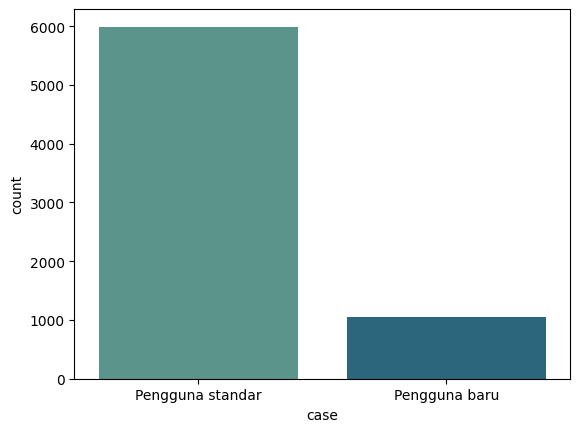

In [105]:
print(pd.read_sql_query(sql, conn)['case'].value_counts())
_ = sns.countplot(x=pd.read_sql_query(sql, conn)['case'], data=df, palette='crest')

Dari hasil visualisasi tersebut dapat dilihat bahwa pengguna baru memiliki perbandingan kurang lebih 1:6 dengan pengguna lama

### 2. Apa profil pelanggan untuk pelanggan yang churn, join, dan stay? Apakah mereka berbeda?

profil pelanggan atau customer status memiliki perbedaan dalam profilnya sebagai berikut:

In [106]:
sql='''Select customer_status from telecom'''
pd.read_sql_query(sql, conn)

,customer_status
0,Churned
1,Churned
2,Churned
3,Stayed
4,Stayed
...,...
7038,Joined
7039,Joined
7040,Joined
7041,Joined


In [107]:
datacs = pd.read_sql_query(sql, conn)

In [108]:
# Ubah kolom customer_status dengan tipe data string menjadi numerik
data_csnew = pd.get_dummies(datacs, columns = ['customer_status'])

In [109]:
data_csnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_status_Churned  7043 non-null   bool 
 1   customer_status_Joined   7043 non-null   bool 
 2   customer_status_Stayed   7043 non-null   bool 
dtypes: bool(3)
memory usage: 20.8 KB


In [110]:
cs_column =['customer_status_Churned','customer_status_Joined','customer_status_Stayed']

In [111]:
# Ubah value features True/False menjadi numerik
for column in ['customer_status_Churned','customer_status_Joined','customer_status_Stayed'] :
  for i in range(len(data_csnew)):
    if data_csnew[column][i] == True :
      data_csnew[column][i] = 1
    else:
      data_csnew[column][i] = 0
  data_csnew[column] = data_csnew[column].astype('int64')
  
# Ubah datatype features servis menjadi int64
for column in cs_column:
  data_csnew[column] = data_csnew[column].astype('int64')


customer_status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


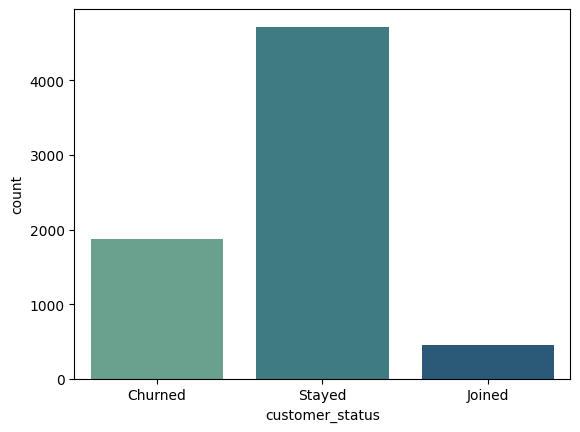

In [112]:
print(pd.read_sql_query(sql, conn)['customer_status'].value_counts())
_ = sns.countplot(x=pd.read_sql_query(sql, conn)['customer_status'], data=df, palette='crest')

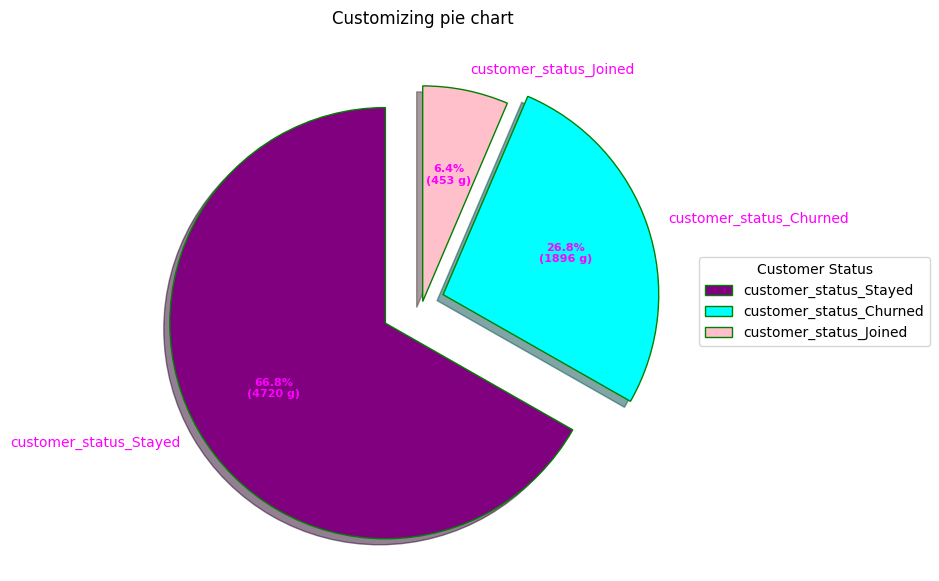

In [113]:
cs_column =['customer_status_Stayed','customer_status_Churned','customer_status_Joined']
data = [4720,1896,454]
# Creating explode data cars
explode = (0.2, 0.1, 0.0)
# Creating color parameters
colors = ("purple","cyan","pink")
 # Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}
 # Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data,
                            autopct=lambda pct: func(pct, data),
                            explode=explode,
                            labels=cs_column,
    						shadow=True,
 							colors=colors,
							startangle=90,
    						wedgeprops=wp,
							textprops=dict(color="magenta"))
# Adding legend
ax.legend(wedges, cs_column,
    title="Customer Status",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Customizing pie chart")
# show plot
plt.show()

Dari pie chart dapat dilihat bahwa masing-masing customer memiliki status yang berbeda dimana customer yang stay lebih banyak dari kedua profil lain, tetapi customer churn lebih banyak dari customer yang join

### 3. Apa yang tampaknya menjadi pendorong utama churn pelanggan?

untuk melihat pendorong utama churn pelanggan diperlukan variabel pendukung yakni churn_reason dan churn_category. Dimana pada masing-masing churn category terbagi menjadi beberapa churn reason sehingga dilakukan identifikasi terhadap variabel churn category terlebih dahulu kemudian dilanjutkan dengan churn reason

In [114]:
sql='''Select churn_category from telecom'''
pd.read_sql_query(sql, conn)

,churn_category
0,Competitor
1,Dissatisfaction
2,Dissatisfaction
3,not-churn
4,not-churn
...,...
7038,not-churn
7039,not-churn
7040,not-churn
7041,not-churn


menginisiasi data menjadi churn

In [115]:
churn = pd.read_sql_query(sql, conn)

karena churn memiliki tipe data string, maka diubah terlebih dahulu menjadi numerik

In [116]:
# Ubah kolom churn_category dengan tipe data string menjadi numerik
churn_data = pd.get_dummies(churn, columns = ['churn_category'])

kemudian melihat tipe data cari churn_data yang telah dibuat dan didapatkan tipedata boolean

In [117]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   churn_category_Attitude         7043 non-null   bool 
 1   churn_category_Competitor       7043 non-null   bool 
 2   churn_category_Dissatisfaction  7043 non-null   bool 
 3   churn_category_Other            7043 non-null   bool 
 4   churn_category_Price            7043 non-null   bool 
 5   churn_category_not-churn        7043 non-null   bool 
dtypes: bool(6)
memory usage: 41.4 KB


kemudian merubah value boolean menjadi numerik

churn_category
not-churn          5174
Competitor          841
Dissatisfaction     321
Attitude            314
Price               211
Other               182
Name: count, dtype: int64


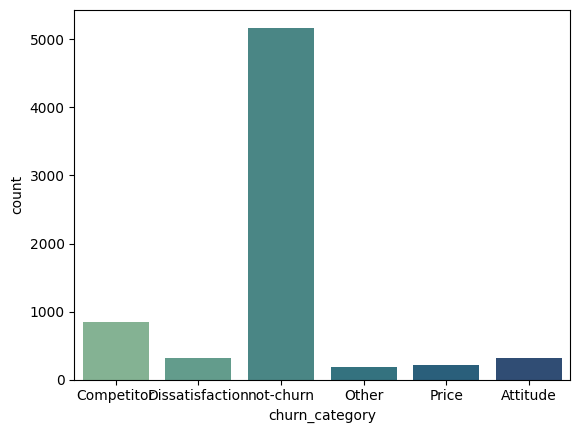

In [118]:
churn_column =['churn_category_Attitude',
               'churn_category_Competitor',
               'churn_category_Dissatisfaction', 
               'churn_category_Other',
               'churn_category_Price',
               'churn_category_not-churn']

# Ubah value True/False menjadi numerik
for column in ['churn_category_Attitude',
               'churn_category_Competitor',
               'churn_category_Dissatisfaction', 
               'churn_category_Other',
               'churn_category_Price',
               'churn_category_not-churn'] :
  for i in range(len(churn_data)):
    if churn_data[column][i] == True :
      churn_data[column][i] = 1
    else:
      churn_data[column][i] = 0
  churn_data[column] = churn_data[column].astype('int64')
  
# Ubah datatype menjadi int64
for column in churn_column:
  churn_data[column] = churn_data[column].astype('int64')

print(pd.read_sql_query(sql, conn)['churn_category'].value_counts())
_ = sns.countplot(x=pd.read_sql_query(sql, conn)['churn_category'], data=df, palette='crest')

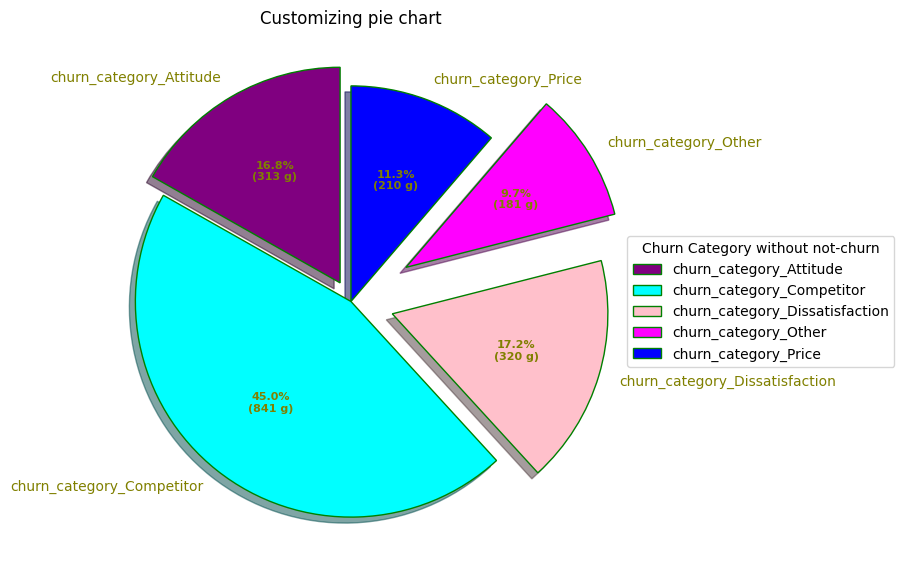

In [119]:
churn_column =['churn_category_Attitude',
               'churn_category_Competitor',
               'churn_category_Dissatisfaction', 
               'churn_category_Other',
               'churn_category_Price']
data = [314,841,321,182,211]
# Creating explode data cars
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
# Creating color parameters
colors = ("purple","cyan","pink","magenta","blue")
 # Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}
 # Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data,
                            autopct=lambda pct: func(pct, data),
                            explode=explode,
                            labels=churn_column,
    						shadow=True,
 							colors=colors,
							startangle=90,
    						wedgeprops=wp,
							textprops=dict(color="olive"))
# Adding legend
ax.legend(wedges, churn_column,
    title="Churn Category without not-churn",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Customizing pie chart")
# show plot
plt.show()

Dari hasil pie chart tersebut dapat diketahui bahwa churn lebih dominan diakibatkan karena category competitor, tetapi dalam churn category masih dapat dibagi kembali  kedalam churn reason maka:

In [120]:
sql='''Select * from telecom'''
pd.read_sql_query(sql, conn)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_refferals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
1,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
2,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
3,0020-INWCK,Female,58,Yes,2,Woodlake,93286,36.464635,-119.094348,9,...,Credit Card,95.75,6849.40,0.0,0,1935.46,8784.86,Stayed,not-churn,not-churn
4,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060264,-122.830646,0,...,Credit Card,61.25,1993.20,0.0,0,0.00,1993.20,Stayed,not-churn,not-churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9629-NHXFW,Female,58,Yes,2,Downey,90241,33.940884,-118.128628,6,...,Credit Card,19.40,19.40,0.0,0,48.79,68.19,Joined,not-churn,not-churn
7039,9840-EFJQB,Female,43,No,0,Sylmar,91342,34.321621,-118.399841,0,...,Bank Withdrawal,74.35,74.35,0.0,0,24.41,98.76,Joined,not-churn,not-churn
7040,9962-BFPDU,Female,61,Yes,3,Kenwood,95452,38.419525,-122.521585,3,...,Credit Card,20.05,20.05,0.0,0,16.02,36.07,Joined,not-churn,not-churn
7041,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,not-churn,not-churn


In [121]:
churn_utama = pd.read_sql_query(sql, conn)

In [122]:
churn_terbanyak_alasan= churn_utama[churn_utama.churn_category == 'Competitor']
churn_terbanyak_alasan.head()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_refferals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
17,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,...,Bank Withdrawal,25.10,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer
36,0067-DKWBL,Male,69,No,0,San Diego,92129,32.961064,-117.134917,0,...,Bank Withdrawal,49.25,91.10,0.0,0,87.98,179.08,Churned,Competitor,Competitor made better offer
49,0093-XWZFY,Male,51,No,0,Desert Hot Springs,92241,33.832799,-116.250973,0,...,Credit Card,104.50,4036.85,0.0,0,1507.60,5544.45,Churned,Competitor,Competitor had better devices
60,0107-YHINA,Male,59,No,0,Los Angeles,90062,34.003553,-118.308933,0,...,Bank Withdrawal,99.75,99.75,0.0,0,40.71,140.46,Churned,Competitor,Competitor had better devices


In [123]:
# Ubah kolom churn_reason dengan tipe data string menjadi numerik
churn_alasan = pd.get_dummies(churn_terbanyak_alasan, columns = ['churn_reason'])

In [124]:
# Drop kolom-kolom yang tidak diperlukan
churn_alasan.drop(columns=['customer_id','gender','age','married','number_of_dependents','city',
                            'zip_code','latitude','longitude','number_of_refferals','tenure_in_months','offer','phone_service',
                            'avg_mounthly_long_distance_charges','multiple_lines','internet_service','internet_type',
                            'avg_monthly_gb_download','online_security', 'online_backup','device_protection_plan',
                            'premium_tech_support','streaming_tv','streaming_movies','streaming_music','unlimited_data','contract',
                            'paperless_billing','payment_method','monthly_charge','total_charges','total_refunds','total_extra_data_charges',
                            'total_long_distance_charges','total_revenue','customer_status','churn_category'],axis = 1,inplace = True)


In [125]:
churn_alasan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 0 to 6236
Data columns (total 4 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   churn_reason_Competitor had better devices              841 non-null    bool 
 1   churn_reason_Competitor made better offer               841 non-null    bool 
 2   churn_reason_Competitor offered higher download speeds  841 non-null    bool 
 3   churn_reason_Competitor offered more data               841 non-null    bool 
dtypes: bool(4)
memory usage: 9.9 KB


Didapatkan alasan dan pendorong utama dari churn berasal dari kompetitor yakni antara lain:
- memiliki perangkat yang lebih
- memberikan penawaran yang lebih baik
- menawarkan kecepatan download yang lebih tinggi
- menawarkan lebih banyak data

In [126]:
churn_alasan.head()

,churn_reason_Competitor had better devices,churn_reason_Competitor made better offer,churn_reason_Competitor offered higher download speeds,churn_reason_Competitor offered more data
0,True,False,False,False
17,False,True,False,False
36,False,True,False,False
49,True,False,False,False
60,True,False,False,False


### 4. Apakah perusahaan kehilangan pelanggan bernilai tinggi? Jika demikian, bagaimana mereka dapat mempertahankannya?

In [127]:
sql='''Select * from telecom'''
pd.read_sql_query(sql, conn)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_refferals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
1,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
2,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
3,0020-INWCK,Female,58,Yes,2,Woodlake,93286,36.464635,-119.094348,9,...,Credit Card,95.75,6849.40,0.0,0,1935.46,8784.86,Stayed,not-churn,not-churn
4,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060264,-122.830646,0,...,Credit Card,61.25,1993.20,0.0,0,0.00,1993.20,Stayed,not-churn,not-churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9629-NHXFW,Female,58,Yes,2,Downey,90241,33.940884,-118.128628,6,...,Credit Card,19.40,19.40,0.0,0,48.79,68.19,Joined,not-churn,not-churn
7039,9840-EFJQB,Female,43,No,0,Sylmar,91342,34.321621,-118.399841,0,...,Bank Withdrawal,74.35,74.35,0.0,0,24.41,98.76,Joined,not-churn,not-churn
7040,9962-BFPDU,Female,61,Yes,3,Kenwood,95452,38.419525,-122.521585,3,...,Credit Card,20.05,20.05,0.0,0,16.02,36.07,Joined,not-churn,not-churn
7041,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,not-churn,not-churn


In [128]:
sql='''Select total_charges from telecom'''
pd.read_sql_query(sql, conn).describe()

,total_charges
count,7043.000000
mean,2280.381264
std,2266.220462
min,18.800000
25%,400.150000
50%,1394.550000
75%,3786.600000
max,8684.800000


In [129]:
df = pd.read_sql_query(sql, conn)

In [130]:
data_with_df = df[df.total_charges >= 3786]
data_with_df.head()

,total_charges
3,6849.40
7,4233.95
8,5375.15
9,6019.35
13,4747.65


In [131]:
data_with_df.value_counts()

total_charges
4370.25          2
5597.65          2
4528.00          2
4976.15          2
5714.20          2
                ..
4916.95          1
4916.40          1
4915.15          1
4914.90          1
8684.80          1
Name: count, Length: 1750, dtype: int64

In [132]:
sql='''Select total_charges >= 3786, customer_status from telecom'''
pd.read_sql_query(sql, conn)

,?column?,customer_status
0,False,Churned
1,False,Churned
2,False,Churned
3,True,Stayed
4,False,Stayed
...,...,...
7038,False,Joined
7039,False,Joined
7040,False,Joined
7041,False,Joined


In [133]:
df1 = pd.read_sql_query(sql, conn)

In [134]:
df11 =['?column?']

?column?
False    5282
True     1761
Name: count, dtype: int64


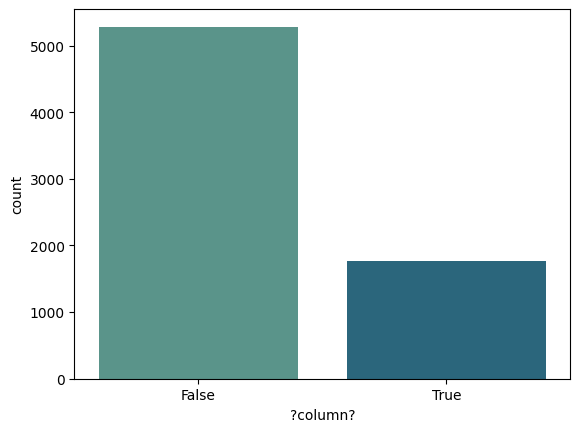

In [135]:
# Ubah value True/False menjadi numerik
for column in ['?column?'] :
  for i in range(len(df1)):
    if df1[column][i] == True :
      df1[column][i] = 1
    else:
      df1[column][i] = 0
  df1[column] = df1[column].astype('int64')
  
# Ubah datatype menjadi int64
for column in df11:
  df1[column] = df1[column].astype('int64')

print(pd.read_sql_query(sql, conn)['?column?'].value_counts())
_ = sns.countplot(x=pd.read_sql_query(sql, conn)['?column?'], data=df, palette='crest')

In [136]:
df1.head()

,?column?,customer_status
0,0,Churned
1,0,Churned
2,0,Churned
3,1,Stayed
4,0,Stayed


In [137]:
# Ubah kolom churn_category dengan tipe data string menjadi numerik
cs1 = pd.get_dummies(df1, columns = ['customer_status'])

In [138]:
cs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ?column?                 7043 non-null   int64
 1   customer_status_Churned  7043 non-null   bool 
 2   customer_status_Joined   7043 non-null   bool 
 3   customer_status_Stayed   7043 non-null   bool 
dtypes: bool(3), int64(1)
memory usage: 75.8 KB


In [139]:
customer_status2=['customer_status_Churned','customer_status_Joined','customer_status_Stayed']

In [140]:
# Ubah value True/False menjadi numerik
for column in ['customer_status_Churned','customer_status_Joined','customer_status_Stayed'] :
  for i in range(len(cs1)):
    if cs1[column][i] == True :
      cs1[column][i] = 1
    else:
      cs1[column][i] = 0
  cs1[column] = cs1[column].astype('int64')
  
# Ubah datatype menjadi int64
for column in df11:
  cs1[column] = cs1[column].astype('int64')



In [141]:
#Seleksi atribut
cs1['Response'] = cs1['?column?']
cs1['customer_status_Churned'] = cs1['customer_status_Churned'] 

In [142]:
df2 = cs1[['customer_status_Joined','customer_status_Stayed','Response', 'customer_status_Churned']]

In [143]:
df2.head()

,customer_status_Joined,customer_status_Stayed,Response,customer_status_Churned
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,1,0
4,0,1,0,0


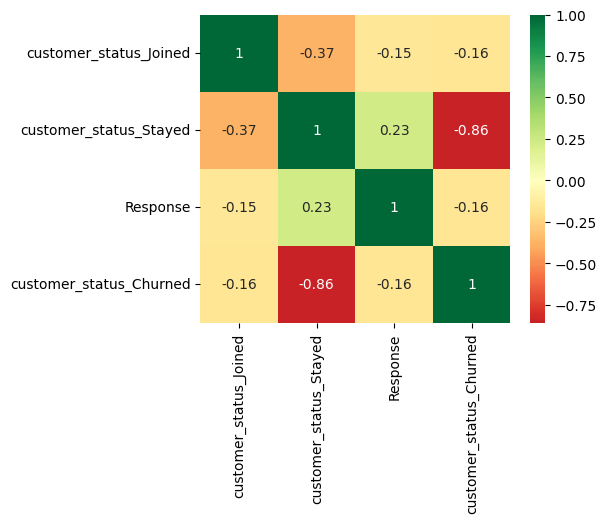

In [151]:
#mengetahui korelasi antar atribut/variabel bebas melalui heatmap
plt.figure(figsize = (5,4))
p=sns.heatmap(df2.corr(), annot=True, cmap='RdYlGn', center=0)

Dari analis diatas diketahui dari total_charges atau biaya total yang dikeluarkan oleh customer dengan range 75% keatas bisa diartikan bahwa dia merupakan customer bernilai tinggi yang dimisalkan menjadi response. Diketahui dari heatmap tersebut churned dan response berkorelasi tetapi sangat kecil. meskipun kecil tetap saja terdapat korelasi yang menandakan bahwa terdapat kehilangan pelanggan yang bernilai tinggi. Cara untuk mempertahankan mereka mungkin bisa dilihat dari hasil analisis 3 yakni:
- memiliki perangkat yang lebih baik dari kompetitor
- memberikan penawaran yang lebih baik dari kompetitor
- menawarkan kecepatan download yang lebih tinggi daripada kompetitor
- menawarkan lebih banyak data daripada kompetitor

# Analisis tambahan yang dilakukan antara lain:

### Melihat apakah pelanggan yang sudah married mempengaruhi lama tenure pelanggan?

In [145]:
sql='''Select * from telecom'''
pd.read_sql_query(sql, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_id                         7043 non-null   object 
 1   gender                              7043 non-null   object 
 2   age                                 7043 non-null   int64  
 3   married                             7043 non-null   object 
 4   number_of_dependents                7043 non-null   int64  
 5   city                                7043 non-null   object 
 6   zip_code                            7043 non-null   int64  
 7   latitude                            7043 non-null   float64
 8   longitude                           7043 non-null   float64
 9   number_of_refferals                 7043 non-null   int64  
 10  tenure_in_months                    7043 non-null   int64  
 11  offer                               7043 no

In [146]:
sql='''Select * from telecom'''
df = pd.read_sql_query(sql, conn)

In [157]:
df.head()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_refferals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
1,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
2,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
3,0020-INWCK,Female,58,Yes,2,Woodlake,93286,36.464635,-119.094348,9,...,Credit Card,95.75,6849.40,0.0,0,1935.46,8784.86,Stayed,not-churn,not-churn
4,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060264,-122.830646,0,...,Credit Card,61.25,1993.20,0.0,0,0.00,1993.20,Stayed,not-churn,not-churn


<Axes: xlabel='customer_status', ylabel='tenure_in_months'>

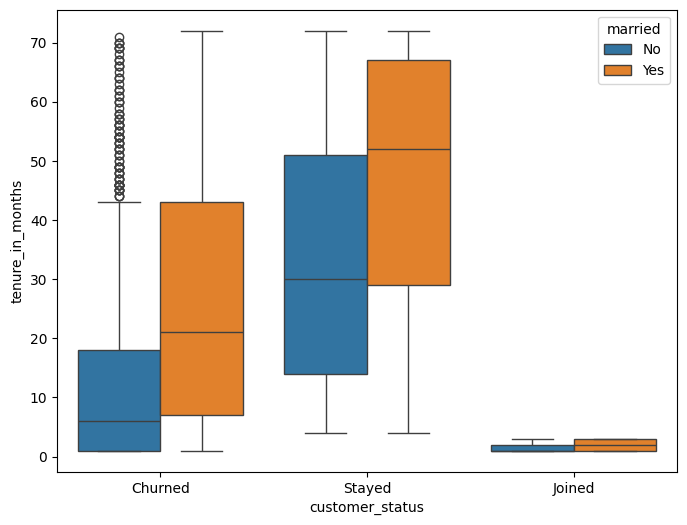

In [160]:
plt.figure(figsize=(8,6))
sns.boxplot(x='customer_status',y='tenure_in_months',hue='married',data=df)

Dari hasil analisis diatas dapat diketahui bahwa married mempengaruhi tenure pelanggan. Dimana pelanggan yang stay dan sudah married memiliki tanure yang lebih tinggi dari yang belum married. Tetapi status married juga mempengaruhi customer yang churn dimana angka churnd semakin tinggi dengan tingginya angka merried.

### Melihat manakah features yang berdampak pada customer churn dan tenure_in_months

In [162]:
service_column = ['phone_service','internet_service','premium_tech_support','device_protection_plan','online_security','online_backup','streaming_tv','streaming_movies','streaming_music','unlimited_data']

In [163]:
sql='''Select * from telecom'''
data = pd.read_sql_query(sql, conn)

In [164]:
# Ubah kolom string menjadi numerik
data_numeric = pd.get_dummies(data, columns = ['gender','contract','payment_method','customer_status'])

# Drop kolom-kolom yang tidak diperlukan
data_numeric.drop(columns=['churn_reason', 'churn_category','multiple_lines','paperless_billing',
                            'offer','city','customer_id','avg_mounthly_long_distance_charges',
                            'avg_monthly_gb_download','internet_type','married'],axis = 1,inplace = True)

# Ubah value features Yes/No menjadi numerik
for column in ['phone_service','internet_service','premium_tech_support','device_protection_plan',
                'online_security','online_backup','streaming_tv','streaming_movies','streaming_music','unlimited_data'] :
  for i in range(len(data_numeric)):
    if data_numeric[column][i] == 'Yes' :
      data_numeric[column][i] = 1
    else:
      data_numeric[column][i] = 0
  data_numeric[column] = data_numeric[column].astype('int64')
  
# Ubah datatype features servis menjadi int64
for column in service_column:
  data_numeric[column] = data_numeric[column].astype('int64')


In [165]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             7043 non-null   int64  
 1   number_of_dependents            7043 non-null   int64  
 2   zip_code                        7043 non-null   int64  
 3   latitude                        7043 non-null   float64
 4   longitude                       7043 non-null   float64
 5   number_of_refferals             7043 non-null   int64  
 6   tenure_in_months                7043 non-null   int64  
 7   phone_service                   7043 non-null   int64  
 8   internet_service                7043 non-null   int64  
 9   online_security                 7043 non-null   int64  
 10  online_backup                   7043 non-null   int64  
 11  device_protection_plan          7043 non-null   int64  
 12  premium_tech_support            70

In [166]:
newnew = ['gender_Female','gender_Male','contract_Month-to-Month','contract_One Year','contract_Two Year','payment_method_Bank Withdrawal','payment_method_Credit Card','payment_method_Mailed Check','customer_status_Churned','customer_status_Joined','customer_status_Stayed']

In [167]:
data_numeric.head()

,age,number_of_dependents,zip_code,latitude,longitude,number_of_refferals,tenure_in_months,phone_service,internet_service,online_security,...,gender_Male,contract_Month-to-Month,contract_One Year,contract_Two Year,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,customer_status_Churned,customer_status_Joined,customer_status_Stayed
0,50,0,92627,33.645672,-117.922613,0,4,1,1,0,...,True,True,False,False,True,False,False,True,False,False
1,78,0,94553,38.014457,-122.115432,1,13,1,1,0,...,True,True,False,False,True,False,False,True,False,False
2,75,0,93010,34.227846,-119.079903,3,3,1,1,0,...,False,True,False,False,False,True,False,True,False,False
3,58,2,93286,36.464635,-119.094348,9,71,1,1,0,...,False,False,False,True,False,True,False,False,False,True
4,52,1,94956,38.060264,-122.830646,0,34,0,1,1,...,False,False,True,False,False,True,False,False,False,True


In [168]:
# Ubah value features boolean menjadi numerik
for column in ['gender_Female','gender_Male','contract_Month-to-Month','contract_One Year','contract_Two Year','payment_method_Bank Withdrawal','payment_method_Credit Card','payment_method_Mailed Check','customer_status_Churned','customer_status_Joined','customer_status_Stayed'] :
  for i in range(len(data_numeric)):
    if data_numeric[column][i] == True :
      data_numeric[column][i] = 1
    else:
      data_numeric[column][i] = 0
  data_numeric[column] = data_numeric[column].astype('int64')
  
# Ubah datatype features newnew menjadi int64
for column in newnew:
  data_numeric[column] = data_numeric[column].astype('int64')


In [169]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             7043 non-null   int64  
 1   number_of_dependents            7043 non-null   int64  
 2   zip_code                        7043 non-null   int64  
 3   latitude                        7043 non-null   float64
 4   longitude                       7043 non-null   float64
 5   number_of_refferals             7043 non-null   int64  
 6   tenure_in_months                7043 non-null   int64  
 7   phone_service                   7043 non-null   int64  
 8   internet_service                7043 non-null   int64  
 9   online_security                 7043 non-null   int64  
 10  online_backup                   7043 non-null   int64  
 11  device_protection_plan          7043 non-null   int64  
 12  premium_tech_support            70

In [170]:
data_numeric.head()

,age,number_of_dependents,zip_code,latitude,longitude,number_of_refferals,tenure_in_months,phone_service,internet_service,online_security,...,gender_Male,contract_Month-to-Month,contract_One Year,contract_Two Year,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,customer_status_Churned,customer_status_Joined,customer_status_Stayed
0,50,0,92627,33.645672,-117.922613,0,4,1,1,0,...,1,1,0,0,1,0,0,1,0,0
1,78,0,94553,38.014457,-122.115432,1,13,1,1,0,...,1,1,0,0,1,0,0,1,0,0
2,75,0,93010,34.227846,-119.079903,3,3,1,1,0,...,0,1,0,0,0,1,0,1,0,0
3,58,2,93286,36.464635,-119.094348,9,71,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,52,1,94956,38.060264,-122.830646,0,34,0,1,1,...,0,0,1,0,0,1,0,0,0,1


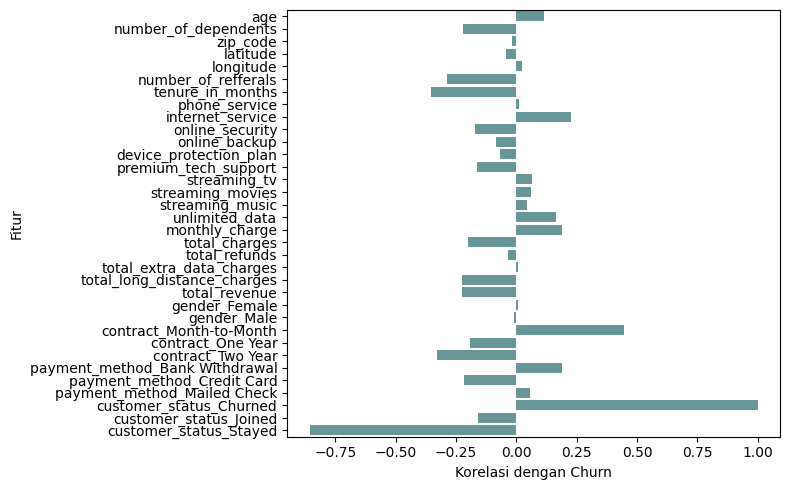

In [171]:
# Hitung korelasi antar fitur
corr = data_numeric.corr()
col = np.array(corr.columns)

# Buat visualisasi bar plot
fig, ax = plt.subplots(figsize=(8,5), tight_layout=True)
sns.barplot(x = corr['customer_status_Churned'], y = col, color = 'cadetblue')
plt.xlabel('Korelasi dengan Churn')
plt.ylabel('Fitur')
plt.show()

Dapat diamati bahwa customer yang churn berkorelasi positif dengan 'contract_Month-to-Month' secara signifikan begitu pula dengan internet_service, dan unlimited_data. Sementara features 'Contract_Two Year' dan 'Total_charge" berkorelasi negatif dengan Churn. Fitur-fitur lain seperti 'MonthlyCharges', 'StramingMovies' dan layanan lainnya turut berkorelasi positif ataupun negatif dengan kolom Churn.
Dari sini fitur yang paling berdampak diperoleh dari contract_Month-to-Month, lama waktu kontrak dan diikuti oleh layanan-layanan lainnya.

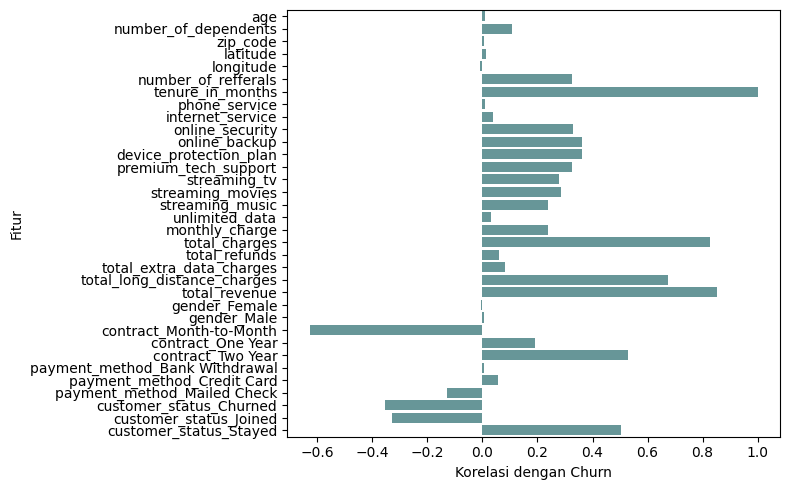

In [172]:
# Hitung korelasi antar fitur
corr = data_numeric.corr()
col = np.array(corr.columns)

# Buat visualisasi bar plot
fig, ax = plt.subplots(figsize=(8,5), tight_layout=True)
sns.barplot(x = corr['tenure_in_months'], y = col, color = 'cadetblue')
plt.xlabel('Korelasi dengan Churn')
plt.ylabel('Fitur')
plt.show()

Dapat diamati bahwa tenure berkorelasi positif dengan hampir seluruh variabel. Sementara features contract_Month-to-Month berkorelasi negatif dengan tenure. Fitur-fitur lain seperti 'MonthlyCharges', 'StramingMovies' dan layanan lainnya turut berkorelasi positif ataupun negatif dengan kolom tenure.